In [1]:
import pandas as pd

In [2]:
# data.csv = transponovani podaci + izbaceni nula geni
df = pd.read_csv("data.csv")
df.head()

,grch38_ZFP41,grch38_ASF1A,grch38_TMEM39A,grch38_CCT7,grch38_DDX60,grch38_EPOR,grch38_NECAP2,grch38_RP4-735C1.4,grch38_SLC43A1,grch38_PGA4,...,grch38_CDC20,grch38_DNAJB9,grch38_OSTM1,grch38_ARMC2,grch38_LCNL1,grch38_PHB,grch38_DNHD1,grch38_CTB-129P6.11,grch38_LRRC29,grch38_ZFP36
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# koliko se ukupno ekspresija gena javila za svaku celiju
sum_of_gene_exprs = df.sum(axis=1)
data_stats = pd.DataFrame(data=sum_of_gene_exprs, columns=["sum_of_gene_exprs"])
data_stats.head()

,sum_of_gene_exprs
0,1605
1,5308
2,4350
3,7730
4,2859


In [12]:
data_stats.shape

(4975, 1)

# Filtriranje celija na osnovu ukupne ekspresije gena

Uslov suma ekspresija gena po celiji >1000 zadovoljavaju sve celije

Sve celije su 'pozitivne', tj broj atributa za koje > 0 je veci od 500 za sve celije

In [13]:
# za skup GSM3087619 svaka celija ima bar 1000 ekspresija gena
(data_stats['sum_of_gene_exprs'] > 1000).count()

4975

## Ovde je greska, cilj je bio izbaciti celije koje imaju manje od 500 nenula vrednosti, dok naredni kod racuna obrnuto, koliko nula vrednosti ima svaka celija. Dakle potrebno je promeniti samo (df != 0).sum(axis=1)

In [14]:
count_of_expr_genes = (df == 0).sum(axis=1)
data_stats['count_of_expr_genes'] = count_of_expr_genes
data_stats.head()

,sum_of_gene_exprs,count_of_expr_genes
0,1605,17434
1,5308,16922
2,4350,17124
3,7730,15990
4,2859,16865


In [15]:
# u svakoj celiji postoji bar 500 gena(atributa) sa nenula vrednoscu
(data_stats['count_of_expr_genes'] > 500).count()

4975

In [16]:
import matplotlib.pyplot as plt

# Pokusaj fit-ovanja gamma raspodele radi odredjivanje granica za filtriranje outlier-a

In [19]:
# k = [log2(N)] + 1 <- broj kategorija
# d = R / k         <- sirina svakog intervala
# R                 <- Raspon uzorka (max - min)
k = np.rint(np.log2(data_stats.shape[0])) + 1
R = data_stats['sum_of_gene_exprs'].max() - data_stats['sum_of_gene_exprs'].min()
d = R / k

print(k, R, d)

13.0 23922 1840.1538461538462


(array([1.42657943e-04, 2.57352308e-04, 1.01040274e-04, 2.29388729e-05,
        1.04863419e-05, 4.80624005e-06, 2.07542184e-06, 9.83094555e-07,
        4.36930913e-07, 4.36930913e-07, 1.09232728e-07, 0.00000000e+00,
        1.09232728e-07]),
 array([ 1263.        ,  3103.15384615,  4943.30769231,  6783.46153846,
         8623.61538462, 10463.76923077, 12303.92307692, 14144.07692308,
        15984.23076923, 17824.38461538, 19664.53846154, 21504.69230769,
        23344.84615385, 25185.        ]),
 <a list of 13 Patch objects>)

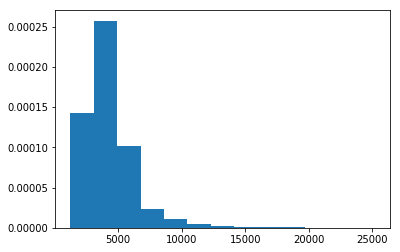

In [21]:
plt.hist(x=data_stats['sum_of_gene_exprs']
        ,bins=[data_stats['sum_of_gene_exprs'].min() + i * d for i in range(int(k)+1)]
        ,density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5f5193c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5f51d148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5f510c08>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5f51dd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5f522408>],
 'means': []}

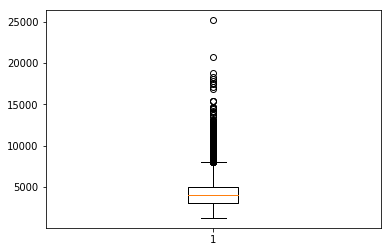

In [80]:
plt.boxplot(data_stats['sum_of_gene_exprs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5f5740c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5f574cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5f56d888>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5f57a9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5f57a348>],
 'means': []}

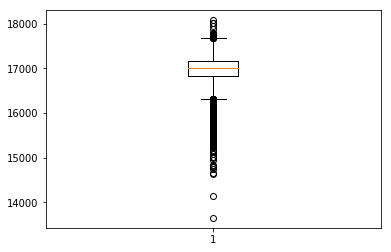

In [81]:
plt.boxplot(data_stats['count_of_expr_genes'])

In [23]:
sample_mean = data_stats['sum_of_gene_exprs'].mean()
sample_disp = data_stats['sum_of_gene_exprs'].var()

In [24]:
from scipy.stats import gamma

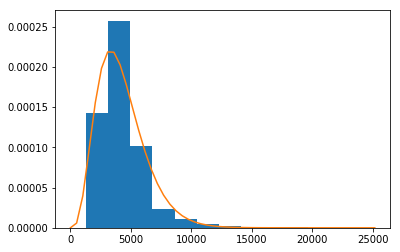

In [53]:
# metod momenata za ocenjivanje parametara gama raspodele
alpha_est = (sample_mean ** 2) / sample_disp
beta_est = sample_mean / sample_disp

equidistant_xs = np.linspace(0, data_stats['sum_of_gene_exprs'].max())
ys = gamma.pdf(equidistant_xs, a=alpha_est, scale = 1 / beta_est)

plt.hist(x=data_stats['sum_of_gene_exprs']
        ,bins=[data_stats['sum_of_gene_exprs'].min() + i * d for i in range(int(k)+1)]
        ,density=True)

plt.plot(equidistant_xs, ys)
plt.show()

In [33]:
from scipy.stats import kstest

In [66]:
# parametri odredjeni sa metodom momenata
kstest_res = kstest(data_stats['sum_of_gene_exprs'], cdf='gamma', args=(alpha_est, 833, 1/beta_est))
kstest_res.pvalue > 0.05
# F(alse)

False

In [69]:
# odredjivanje parametara sa gamma.fit
res =kstest(data_stats['sum_of_gene_exprs'], cdf='gamma', args=gamma.fit(data_stats['sum_of_gene_exprs']))
res.pvalue > 0.05
# F(alse)

False

In [73]:
from sklearn.ensemble import IsolationForest

# Isolation Forest (ukradeno od Veljkovica)

Još jedan ugao iz kog se mogu posmatrati elementi izvan granica je osobina separabilnosti. Elementi izvan granica se lakše (korišćenjem manjeg broja uslova, jednostavnijih funkcija, ...) mogu razdvojiti od ostalih elemenata, u odnosu na elemente koji pripadaju klasterima. Jedan od algoritama koji uzima ovo svojstvo u obzir je Isolation Forest koji po proizvoljno odabranom atributu deli skup na dva dela proizvoljnom pravom i postupak ponavlja sve dok sve instance nisu izolovane od ostalih. Ideja algoritma je da se elementi koji su izvan granica mogu izdvojiti u manjem broju iteracija u odnosu na regularne elemente. Jedna od karakteristika ovog algoritma je da cilj nije formiranje klastera i označavanje preostalih elemenata za outlier-e, već obrnuto, cilj direktno pronalaženje outlier-a.

Početno stanje podrazumeva čvor koji sadrži sve elemente skupa. Svakom iteracijom skup se proizvoljnom pravom deli na dva skupa i time stablo dobija dva nova čvora. Dužina puta od korena (celog skupa) do lista koji sadrži samo jednu instancu koristi se kao mera (inverz) anomalije elementa koji se nalazi u listu. Što je put kraći, veća je verovatnoća da je element outlier. Postupak formiranja takvih stabla se ponavlja više puta i izračunava se prosečna dužina puteva. Dobijena vrednost predstavlja prag dužine ispod kog se element smatra outlier-om. Svaki od elemenata dobija skor kao prosečna vrednost skorova u svakom od stabala.

In [75]:
labels = IsolationForest(n_estimators=100, contamination='auto', behaviour='new').fit_predict(df)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
import functoolse
number_of_detected_outliers = functools.reduce(lambda acc, x: acc + 1 if x == -1 else acc, labels)
number_of_detected_outliers

16